In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
data=pd.read_csv("Breast_cancer_data.csv")

In [6]:
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [7]:
data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [8]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [10]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [11]:
data.duplicated().sum()

0

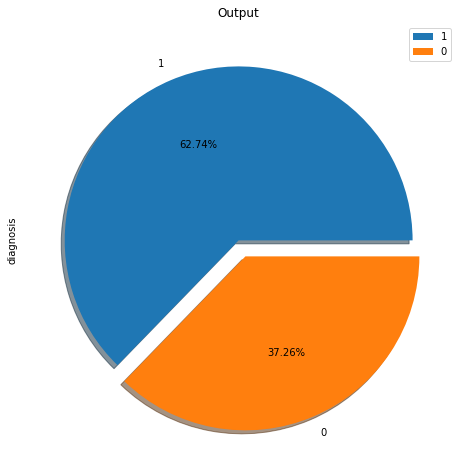

In [12]:
# Original data
plt.figure(figsize=(8,8))
data['diagnosis'].value_counts().plot.pie(shadow=True, explode = [0,0.1],autopct='%1.2f%%')
plt.title("Output")
plt.legend()
plt.show()

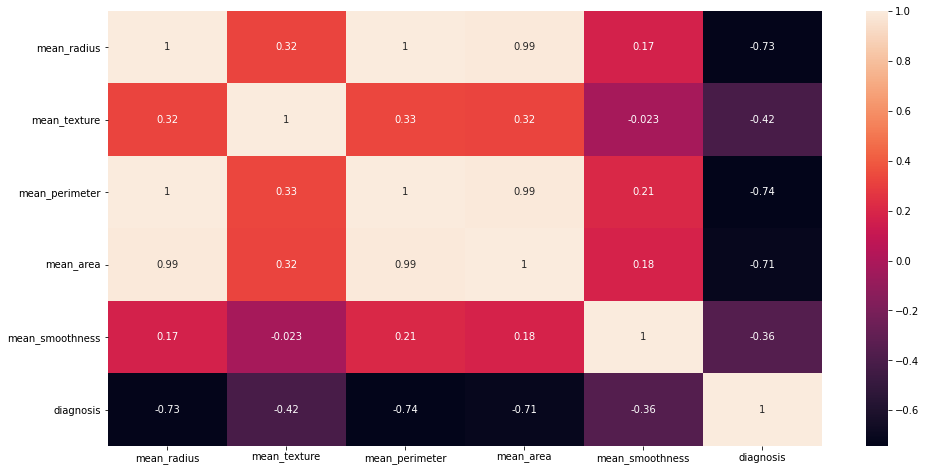

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [14]:
Num_cols = [col for col, dtype in data.dtypes.items() if dtype == 'int64' or dtype == 'float64']

c:\users\rezfan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\rezfan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\rezfan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\rezfan\appdata\l

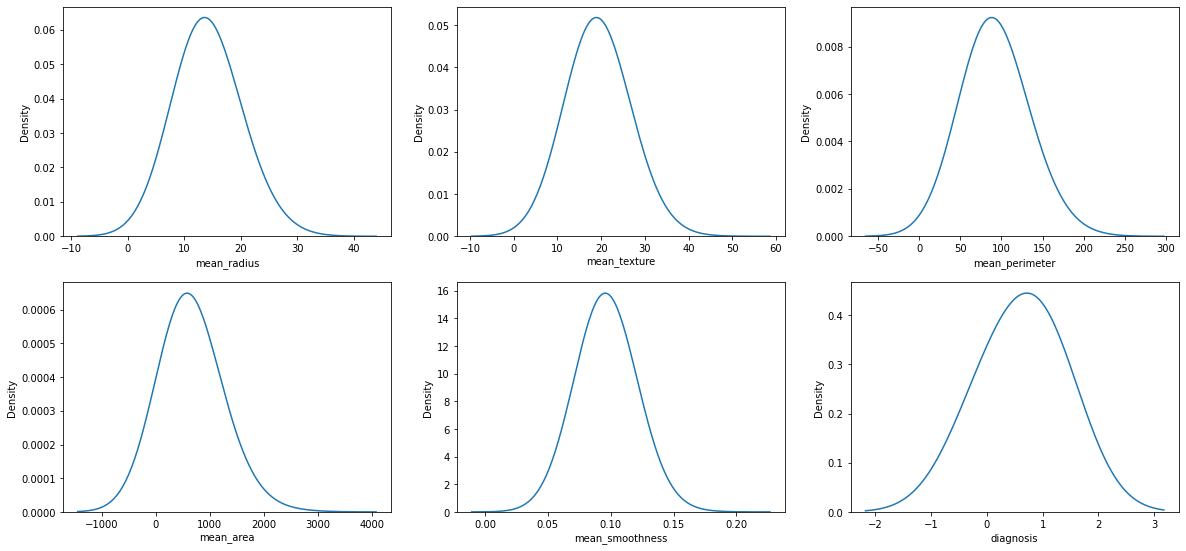

In [15]:
# Original Data (check distribution)
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for Num_col in Num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.kdeplot(data[Num_col], bw=1.5)
    plt.xlabel(Num_col)
    plotnumber+=1
plt.show()

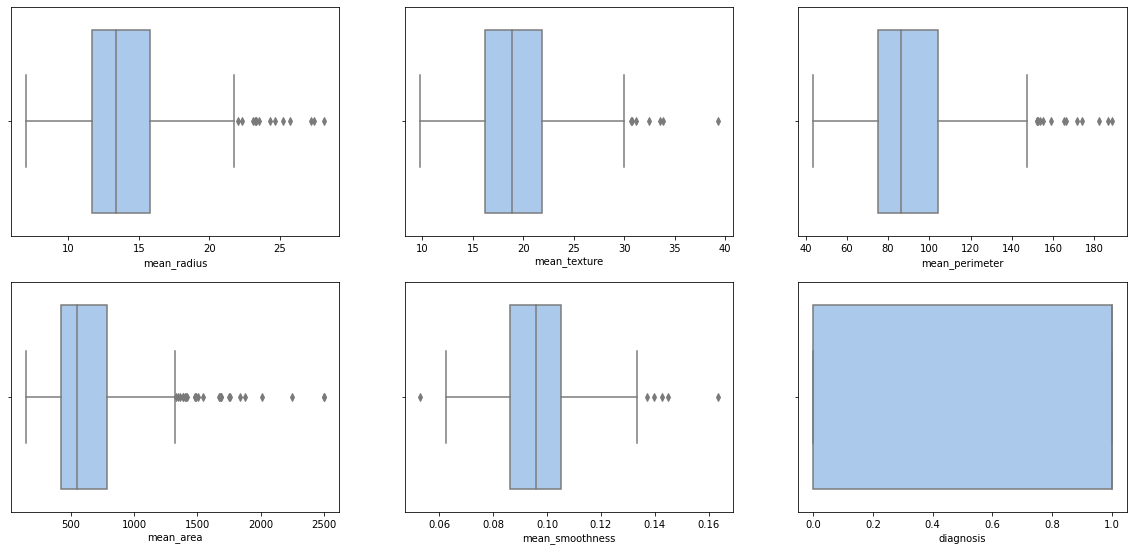

In [16]:
plt.figure(figsize=(20,60))
plotnumber =1
for num_col in Num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data = data, x = num_col, palette='pastel')
    plt.xlabel(num_col)
    plotnumber+=1
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(data,test_size = 0.20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='diagnosis',axis=1)
train_Y = train['diagnosis']
test_X  = test.drop(labels='diagnosis',axis=1)
test_Y  = test['diagnosis']

In [19]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [25]:
train_Y.value_counts()

1    287
0    168
Name: diagnosis, dtype: int64

In [28]:
train_smote_Y.value_counts()

diagnosis
0            287
1            287
dtype: int64

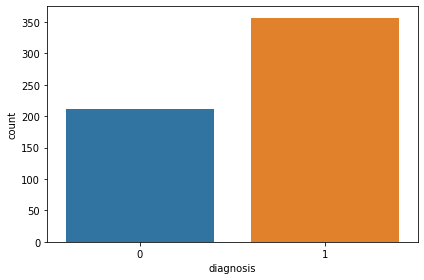

In [29]:
plt.figure(figsize = (6, 4))
sns.countplot(data = data, x = 'diagnosis')
plt.tight_layout()

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Modeling dengan Random Forest
rfc=RandomForestClassifier(random_state=111)

#menentukan hyperparameter yang optimal
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

In [31]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(train_smote_X, train_smote_Y)

c:\users\rezfan\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\rezfan\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\rezfan\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\rezfan\appdata\local\programs\p

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=111),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [32]:
CV_rfc.best_score_

0.9460260325770796

In [34]:
predic=CV_rfc.predict(test_X)

In [36]:
from sklearn.metrics import confusion_matrix
#membuat confusion matrix
CF=confusion_matrix(test_Y, predic)
CF

array([[41,  3],
       [ 3, 67]], dtype=int64)

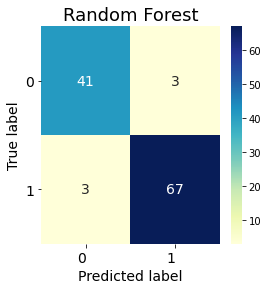

In [37]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_Y, predic))
                                   
# Plot confusion matrix
plt.figure(figsize = (4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Random Forest', fontsize=18, color='Black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [38]:
test_Y.value_counts()

1    70
0    44
Name: diagnosis, dtype: int64

In [40]:
from sklearn.metrics import classification_report
#melihat classification report
target_names = ['No','Yes']
print(classification_report(test_Y, predic, target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.93      0.93        44
         Yes       0.96      0.96      0.96        70

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



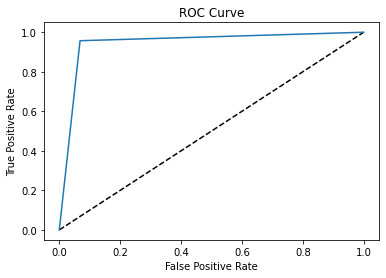

In [42]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, predic)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predic)

0.9444805194805197